<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Using TensorFlow Keras, Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn.

This is your "Hello World!" of TensorFlow.

### Example TensorFlow Starter Code

```python 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(3, activation='sigmoid', input_dim=2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X,y, epochs=100)

```

### Additional Written Tasks:
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

In [ ]:
##### Your Code Here #####



### Build a Tensor Keras Perceptron

Try to match the architecture we used on Monday - inputs nodes and one output node. Apply this architecture to the XOR-ish dataset above. 

After fitting your model answer these questions: 

Are you able to achieve the same results as a bigger architecture from the first part of the assignment? Why is this disparity the case? What properties of the XOR dataset would cause this disparity? 

Now extrapolate this behavior on a much larger dataset in terms of features. What kind of architecture decisions could we make to avoid the problems the XOR dataset presents at scale? 

*Note:* The bias term is baked in by default in the Dense layer.

### Starting with a toy dataset- titanic

* Import Tensorflow
* Define a model
* Compile the model
* Fit the model
* Evaluate the model


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from numpy import loadtxt


In [211]:
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/ashishpatel26/Titanic-Machine-Learning-from-Disaster/master/input/train.csv')
dataset.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'],  inplace = True)
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [212]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [213]:
dataset['Sex'].replace(['male', 'female'], [0,1], inplace = True)
dataset['Embarked'].replace(['S', 'C', 'Q'], [0,1, 2], inplace = True)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,NaN,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [226]:
# Contains 891 samples(rows) with 5 columns, Split the dataset into Inputs and Output
feats = list(dataset)[1:8]
target = list(dataset)[0]

X = dataset[feats]
y = dataset[ target]

# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 7) (268, 7) (623,) (268,)


In [227]:
dataset.fillna(method = 'bfill', inplace = True)

In [228]:
dataset.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [229]:
# Defining model

model = Sequential()
model.add(Dense(32, input_dim = 7, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation ='sigmoid'))

In [218]:
plot_model(model, show_shapes = True, show_layer_names = True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [230]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [232]:
# Fit model
titanic = model.fit(X_train, y_train,
                    epochs = 50, 
                    batch_size = 32, 
                    verbose = 0
                   )
                    


In [237]:
titanic_df= pd.DataFrame(titanic.history)
titanic_df.tail()

,loss,accuracy
45,0.482256,0.781701
46,0.504139,0.791332
47,0.525936,0.767255
48,0.508579,0.768860
49,0.508444,0.770465


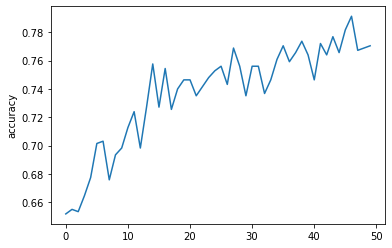

In [239]:
import seaborn as sns

sns.lineplot(x = titanic_df.index.values, y = 'accuracy' , data = titanic_df);

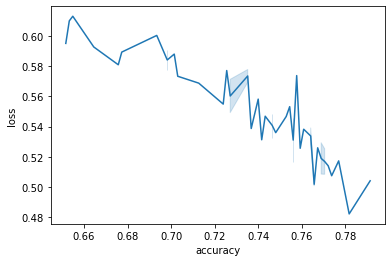

In [241]:
import seaborn as sns

sns.lineplot(y = 'loss', x = 'accuracy' , data = titanic_df);

In [242]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
print('Model Loss: %.2f, Accuracy:%.2f' % ((loss*100), (accuracy*100)))

Model Loss: 48.76, Accuracy:76.49


## Try building/training a more complex MLP on a bigger dataset.

Use TensorFlow Keras & the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the canonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the Internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

In [276]:
# Defining model

model2 = Sequential()
model2.add(Dense(5, input_dim = 784, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(5, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(5, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(5, activation = 'sigmoid'))
model.add(Dropout(0.2))
model2.add(Dense(10, activation = 'softmax'))


In [277]:
# Compile model
model2.compile(optimizer =SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [278]:
# Check summary of model

model2.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dropout_17 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_75 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_18 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_76 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_19 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_77 (Dense)             (None, 5)               

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [279]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [280]:
(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()

In [281]:
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

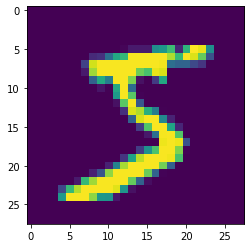

In [282]:
import matplotlib.pyplot as plt

plt.imshow(X_train2[0]);

In [283]:
print(y_train2[0])

5


In [284]:
X_train2 = X_train2.reshape((60000, 784))
X_test2 = X_test2.reshape((10000, 784))

In [285]:
X_train2.shape, X_test2.shape

((60000, 784), (10000, 784))

In [286]:
y_train2[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# Fit model
mod = model2.fit(X_train2, y_train2, 
           epochs = 50,
           batch_size = 32,  
           verbose =1, 
           validation_data = (X_test2, y_test2))

In [290]:
mod_df = pd.DataFrame(mod.history)
mod_df['epoch']= mod_df.index.values
mod_df.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.014044,0.203867,1.920026,0.2121,0
1,2.015696,0.203350,1.919553,0.2117,1
2,2.016839,0.202317,1.918978,0.2127,2
3,2.010470,0.205083,1.915068,0.2127,3
4,2.015329,0.202833,1.943560,0.2126,4


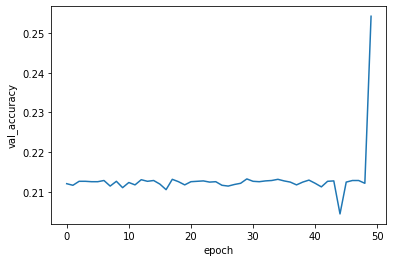

In [291]:
sns.lineplot(x = 'epoch', y = 'val_accuracy' , data = mod_df);

In [294]:
# Defining model

model4 = Sequential()
model4.add(Dense(5, input_dim = 784, activation = 'sigmoid'))
model4.add(Dense(5, activation = 'sigmoid'))
model4.add(Dense(5, activation = 'sigmoid'))
model4.add(Dense(5, activation = 'sigmoid'))
model4.add(Dense(10, activation = 'softmax'))

model4.compile(optimizer =SGD(learning_rate = 0.01), 
               loss = 'sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

In [ ]:
# Fit model
mod4 = model4.fit(X_train2, y_train2, 
           epochs = 50,
           batch_size = 32,  
           verbose =1, 
           validation_data = (X_test2, y_test2))

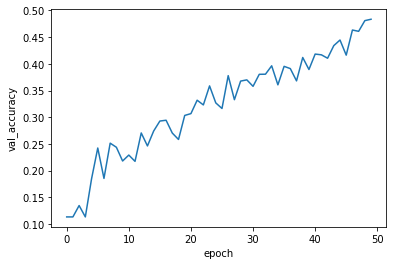

In [296]:
mod4_df = pd.DataFrame(mod4.history)
mod4_df['epoch']= mod4_df.index.values
mod4_df.head()

sns.lineplot(x = 'epoch', y = 'val_accuracy' , data = mod4_df);

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simplify the problem for now: Zero or all else.

In [319]:
y_test.shape

(268,)

In [316]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [ ]:
# A Nice Binary target for ya to work with
y_train

### Estimating Your `net

In [325]:
##### Your Code Here #####


## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?

### Stochastic Gradient Descent 

* Batches
* Learning rate
* Evaluation

### Batches - number of observations our model is hown to make predictions and update weights. Batches are selected randomly during epoch.  All observations are considered when passing thru an epoch at some point. 
* Smaller Batch - slower runtime(but maybe more accurate results)
* Default Batch - Balance between speed and accuracy
* Large Batch - Very fast, but not as nearly as accurate.

#### Batch Size Experiment

In [169]:
sgd = SGD(learning_rate = 0.01)

In [170]:
# Defining model

model3 = Sequential()
model3.add(Dense(5, input_dim = 784, activation = 'sigmoid'))
model3.add(Dense(5, activation = 'sigmoid'))
model3.add(Dense(10, activation = 'softmax'))

In [171]:
# Compile model
model3.compile(optimizer =sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fit model, with default batch_size = 32
batch_default = model3.fit(X_train2, y_train2,
                           epochs = 25, 
                           batch_size = 32, 
                           validation_data = (X_test, y_test))

In [173]:
# Defining model
model3 = Sequential()
model3.add(Dense(5, input_dim = 784, activation = 'sigmoid'))
model3.add(Dense(5, activation = 'sigmoid'))
model3.add(Dense(10, activation = 'softmax'))


# Compile model
model3.compile(optimizer =sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fit model, with SMALL batch_size = 10
batch_small = model3.fit(X_train2, y_train2,
                           epochs = 25, 
                           batch_size =10 , 
                           validation_data = (X_test, y_test))

In [175]:
# Defining model
model3 = Sequential()
model3.add(Dense(5, input_dim = 784, activation = 'sigmoid'))
model3.add(Dense(5, activation = 'sigmoid'))
model3.add(Dense(10, activation = 'softmax'))


# Compile model
model3.compile(optimizer =sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fit model, with LARGE batch_size = 100
batch_large = model3.fit(X_train2, y_train2,
                           epochs = 25, 
                           batch_size =100 , 
                           validation_data = (X_test, y_test))

In [177]:
import seaborn as sns
import pandas as pd

In [194]:
#df = pd.DataFrame(columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy', 'epoch', 'batch_size'])

default= pd.DataFrame(batch_default.history)
default['epoch']= default.index.values
default['batch_size']= 'Deafault32'

small= pd.DataFrame(batch_small.history)
small['epoch']= small.index.values
small['batch_size']= 'Small10'

large= pd.DataFrame(batch_large.history)
large['epoch']= large.index.values
large['batch_size']= 'Large100'

df = pd.concat([default, small, large])

,loss,accuracy,val_loss,val_accuracy,epoch,batch_size
0,2.172016,0.277533,2.056992,0.3243,0,Deafault32
1,1.948550,0.362267,1.825224,0.3957,1,Deafault32
2,1.733509,0.404800,1.630171,0.4027,2,Deafault32
3,1.585682,0.401583,1.522858,0.4356,3,Deafault32
4,1.498481,0.418517,1.466266,0.4067,4,Deafault32


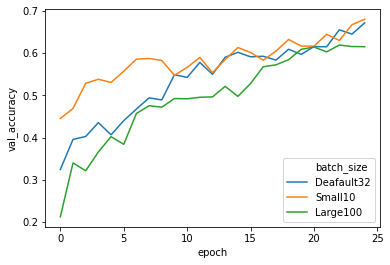

In [196]:
sns.lineplot(x = 'epoch', y = 'val_accuracy' , hue = 'batch_size', data = df);

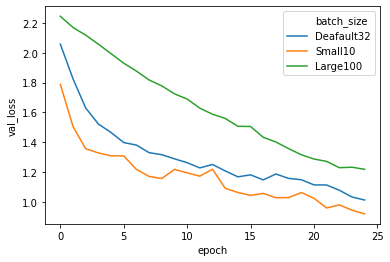

In [197]:
sns.lineplot(x = 'epoch', y = 'val_loss' , hue = 'batch_size', data = df);

### Learning Rate

Controls the size of the update to our weights that the optimization algorithm makes. Very Important hyperparameter. 
* Too high causes unstable results
* Too low the model will never converge
* Goldy lucks - just right

Rates
- High - 0.75
- Default - 0.01
- Low - 0.001

### Learning Rate Experiment

In [199]:
sgd = SGD(learning_rate = 0.75)

In [202]:
# Defining model

model3 = Sequential()
model3.add(Dense(5, input_dim = 784, activation = 'sigmoid'))
model3.add(Dense(5, activation = 'sigmoid'))
model3.add(Dense(10, activation = 'softmax'))


# Compile model
model3.compile(optimizer =sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fit model, with high learning rate = .75
lr_high = model3.fit(X_train2, y_train2,
                           epochs = 25, 
                           batch_size =100 , 
                           validation_data = (X_test, y_test))

In [ ]:
sgd = SGD(learning_rate = 0.001)

# Defining model

model3 = Sequential()
model3.add(Dense(5, input_dim = 784, activation = 'sigmoid'))
model3.add(Dense(5, activation = 'sigmoid'))
model3.add(Dense(10, activation = 'softmax'))


# Compile model
model3.compile(optimizer =sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fit model, with low learning rate = 0.001
lr_low = model3.fit(X_train2, y_train2,
                           epochs = 25, 
                           batch_size =100 , 
                           validation_data = (X_test, y_test))

In [205]:
sgd = SGD(learning_rate = 0.01)

# Defining model

model3 = Sequential()
model3.add(Dense(5, input_dim = 784, activation = 'sigmoid'))
model3.add(Dense(5, activation = 'sigmoid'))
model3.add(Dense(10, activation = 'softmax'))


# Compile model
model3.compile(optimizer =sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fit model, with default learning rate = 0.01
lr_default = model3.fit(X_train2, y_train2,
                           epochs = 25, 
                           batch_size =100 , 
                           validation_data = (X_test, y_test))

In [207]:
default_lr= pd.DataFrame(lr_default.history)
default_lr['epoch']= default_lr.index.values
default_lr['batch_size']= 'Deafault32'

small_lr= pd.DataFrame(lr_low.history)
small_lr['epoch']= small_lr.index.values
small_lr['batch_size']= 'Small10'

large_lr= pd.DataFrame(lr_high.history)
large_lr['epoch']= large_lr.index.values
large_lr['batch_size']= 'Large100'

df_lr = pd.concat([default_lr, small_lr, large_lr])

In [208]:
df_lr.head()

,loss,accuracy,val_loss,val_accuracy,epoch,batch_size
0,2.249393,0.191100,2.199322,0.2849,0,Deafault32
1,2.167917,0.298800,2.140253,0.2881,1,Deafault32
2,2.108409,0.297333,2.078271,0.2933,2,Deafault32
3,2.043530,0.300100,2.013578,0.2945,3,Deafault32
4,1.974457,0.312700,1.945011,0.3042,4,Deafault32


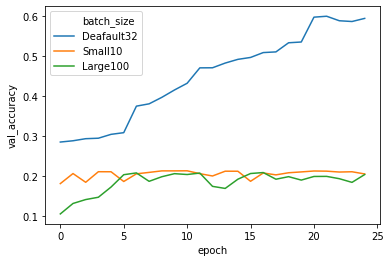

In [209]:
sns.lineplot(x = 'epoch', y = 'val_accuracy' , hue = 'batch_size', data = df_lr);

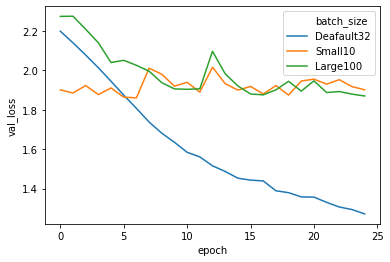

In [210]:
sns.lineplot(x = 'epoch', y = 'val_loss' , hue = 'batch_size', data = df_lr);